In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import statsmodels.api as sm

In [3]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [4]:
# NON STATIONARY
df1 = pd.read_csv('data/airline_passengers.csv', index_col=0, parse_dates=True)
df1.index.freq = 'MS'
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
# STATIONARY
df2 = pd.read_csv('data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D'
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.DataFrame({'a':[12,5,11,12,9]})
df

,a
0,12
1,5
2,11
3,12
4,9


## acf- autocorrelation function
relationship between y and y(t+1) and so on

In [8]:
acf(df['a'])

array([ 1.        , -0.44367816, -0.25517241,  0.24942529, -0.05057471])

## pacf- partial autocorrelation function
relationship between residual of y and y(t+1) and with y(t+1) and so on

In [11]:
pacf_yw(df['a'], nlags=4, method='unbiased')

array([ 1.        , -0.5545977 , -1.05841035,  5.39248163,  0.88065127])

In [12]:
pacf_ols(df['a'], nlags=4)

array([ 1.        , -0.44117647, -0.44186047,  0.57535488,  0.24827586])

In [13]:
from pandas.plotting import lag_plot

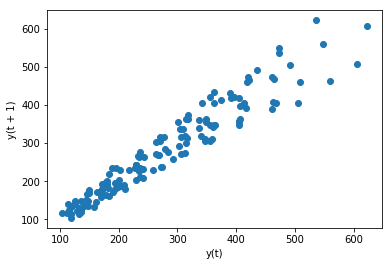

In [14]:
lag_plot(df1['Thousands of Passengers'])

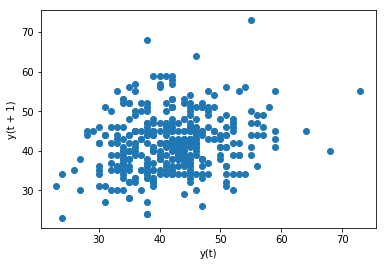

In [18]:
lag_plot(df2['Births'])

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

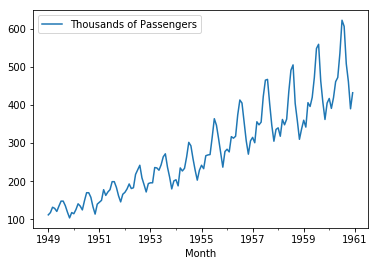

In [20]:
df1.plot()

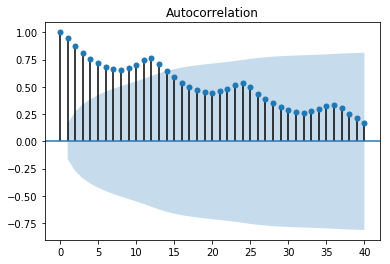

In [22]:
plot_acf(df1, lags=40);

This plot indicates non-stationary data, as there are a large number of lags before ACF values drop off.

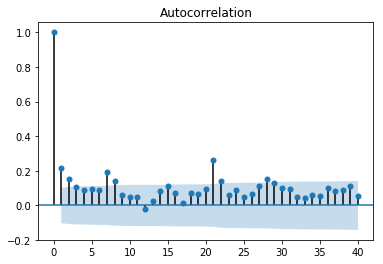

In [24]:
plot_acf(df2, lags=40);

This is a typical ACF plot for stationary data, with lags on the horizontal axis and correlations on the vertical axis. The first value  y0 is always 1. A sharp dropoff indicates that there is no AR component in the ARIMA model.

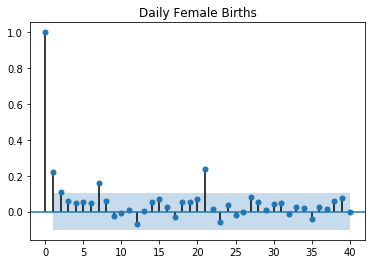

In [25]:
plot_pacf(df2,lags=40, title='Daily Female Births');